In [73]:
# Third-party imports
import matplotlib.pyplot as plt
import pandas as pd
# Scikit-learn imports
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [4]:
df=pd.read_excel(r"C:\Users\Lenovo\Desktop\LMS_PROJECT\K-Means Project\Dataset\cust_data.xlsx")
df.sample(5)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
18574,18575,F,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21991,21992,F,0,0,0,0,1,0,0,0,...,0,0,2,0,0,0,0,0,0,0
5242,5243,M,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17654,17655,F,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
25338,25339,NaN,2,2,0,0,0,0,0,0,...,0,2,1,0,0,0,1,0,0,1


In [6]:
# Data Cleaning
df.drop('Cust_ID', axis=1, inplace=True)

In [55]:
#df.info()
# Fill Missing values

In [51]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [67]:
# Define preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), df.select_dtypes(include=['int64']).columns),
        ('cat', OneHotEncoder(drop='first'), ['Gender'])  # For the categorical column
    ])

# Create pipeline with imputation and preprocessing
pipeline = Pipeline([('preprocessor', preprocessor),
    ('imputer', KNNImputer(n_neighbors=5)) # KNN imputation for missing Gender
    
])

# Apply the pipeline
X_processed = pipeline.fit_transform(df)

In [71]:
# determine optimal number of clusters

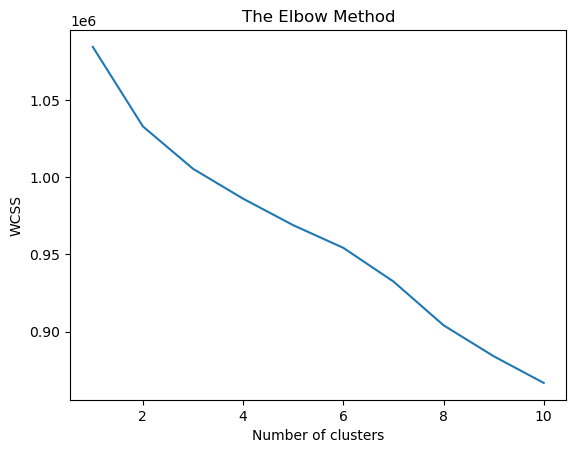

In [100]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=17)
    kmeans.fit(X_processed)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [77]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_processed)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

In [97]:
# Analyze cluster characteristics
cluster_stats = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_stats)

           Orders    Jordan  Gatorade   Samsung      Asus      Udis  \
Cluster                                                               
0        4.600457  0.688093  0.600105  0.495083  0.484721  0.443098   
1        4.066403  0.139287  0.144614  0.141640  0.074304  0.064006   
2        4.146897  0.633150  0.588374  0.423409  0.289866  0.212097   
3        3.984127  0.319444  0.289683  0.275794  0.073413  0.140873   

         Mondelez International  Wrangler      Vans      Fila  ...        LG  \
Cluster                                                        ...             
0                      0.314717  0.320337  0.230067  0.056024  ...  0.123288   
1                      0.087265  0.045097  0.070087  0.029828  ...  0.058946   
2                      0.274156  0.267871  0.320503  0.116261  ...  0.777690   
3                      0.170635  0.053571  0.091270  3.351190  ...  0.111111   

             Dior    Scabal  Tommy Hilfiger  Hollister  Forever 21  Colavita  \
Cluster     

In [89]:
# For categorical variable (Gender)
gender_dist = df.groupby(['Cluster', 'Gender']).size().unstack()
gender_dist.head(5)

Gender,F,M
Cluster,,
0,5218,476
1,18050,4479
2,1117,156
3,393,111


# Conclusion

1. **Cluster 0: Trendsetters**  
   (High-end fashion + sports brands like Dior, Jordan, Scabal)

2. **Cluster 1: Casual Buyers**  
   (Low engagement across all brands)

3. **Cluster 2: Tech & Gear Fans**  
   (Dominates LG, Microsoft, Wrangler, Jordan)

4. **Cluster 3: Fila Fanatics**  
   (Extreme Fila preference, ignores other brands)

